# Introdução a Ciência de Dados
## Aula2 - Tutoria

Edesio Alcobaça <br>
email: edesio@usp.br <br>
LinkedIn: https://www.linkedin.com/in/ealcobaca/ <br>

## Exercícios

In [ ]:
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

plt.rcParams['figure.dpi'] = 150
seed = 42

1. Para um polinômio de grau $M=9$, avalie como o erro se comporta quando aumentamos o tamanho do conjunto de treinamento. Considere N=10 até 1000. Ou seja, faça um gráfico de N versus o erro quadrático médio (RMSE).

In [ ]:
def sinx(x):
  return np.sin(2 * np.pi * x)

In [ ]:
mse_train = []
mse_test = []

test_size = .33

max_n = 1000
min_n = 20

max_sample = int(max_n / (1-test_size))
min_sample = int(min_n / (1-test_size))

sample_size_l = np.arange(min_sample, max_sample+1, 10)

for n in sample_size_l:

  np.random.seed(1337)

  X = np.linspace(0, 1, n) # gerando n elementos igualmente espaçados entre 0 e 1
  y = sinx(X) + np.random.normal(0, 0.1, n) # adcionando um ruído a cada valor

  X_train, X_test, y_train, y_test = train_test_split(
      X.reshape(-1, 1),
      y.reshape(-1, 1),
      test_size=test_size,
      random_state=seed
      )
  
  pf = PolynomialFeatures(degree=9)
  X_train_pf = pf.fit_transform(X_train)
  X_test_pf  = pf.transform(X_test)


  model = LinearRegression()
  model.fit(X_train_pf, y_train)  
  y_train_pred = model.predict(X_train_pf)
  y_test_pred  = model.predict(X_test_pf)

  rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
  rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)

  mse_train.append(rmse_train)
  mse_test.append(rmse_test)


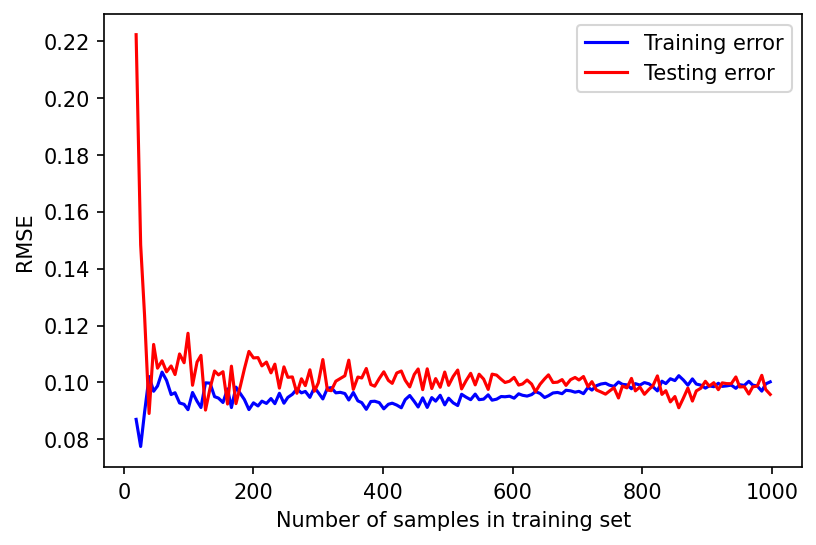

In [ ]:
n_samples_train = (sample_size_l*(1-test_size))
n_samples_train = n_samples_train.astype(int)

plt.plot(n_samples_train, mse_train, 'b-', label = 'Training error')
plt.plot(n_samples_train, mse_test, 'r-', label = 'Testing error')

plt.xlabel("Number of samples in training set")
plt.ylabel('RMSE')

plt.legend()
plt.show()

4. Varie o número de folds para a base iris, de 2 até 20 e verifique se essa escolha influencia na classificação.

In [ ]:
import pandas as pd

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_validate


df = pd.read_csv("iris.csv")

# Separa as features do rotulo
X = df.drop(columns='species')
y = df['species']

# Define o numero de folds
n_folds_values = np.arange(2, 21)

# Lista para armazenar a média de acuracia 
cv_means = []

for n_folds in n_folds_values:
    model = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
    cv_result = cross_validate(model, X, y, scoring='accuracy', cv=n_folds)
    cv_mean = cv_result['test_score'].mean()
    cv_means.append(cv_mean)


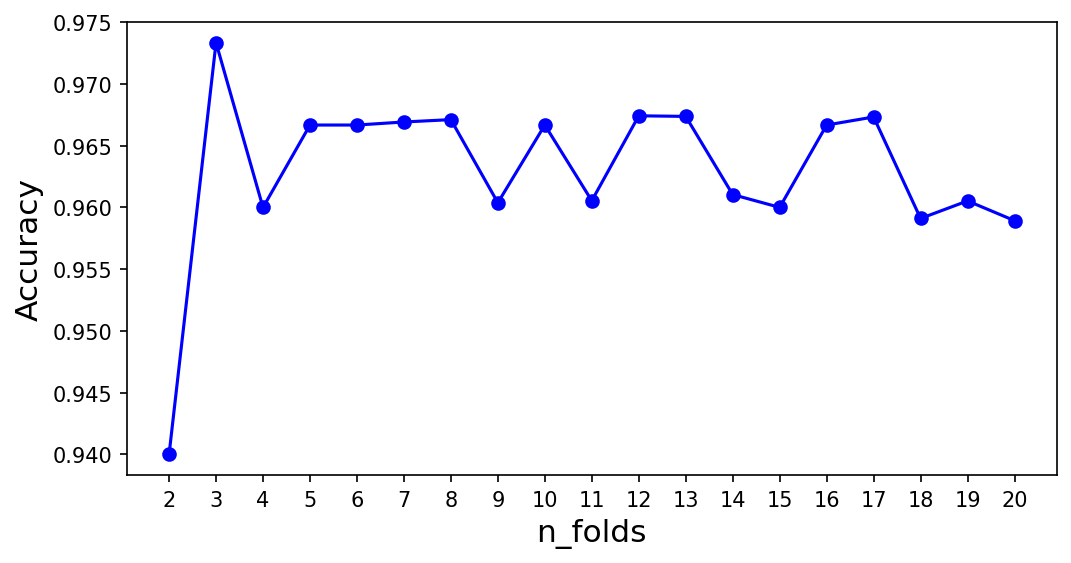

In [ ]:
plt.figure(figsize=(8, 4))
plt.plot(n_folds_values, cv_means, '-bo')
plt.xlabel('n_folds', fontsize = 15)
plt.xticks(n_folds_values)
plt.ylabel('Accuracy', fontsize = 15)
plt.show()

## Extra

1. Ajuste de hiperparâmetro

In [52]:
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


# seed
seed = 42

1.1 Dividir os dados em traino/teste

In [53]:
# carregar os dados
data = pd.read_csv("Vehicle.csv")

y = data["Class"]
X = data.drop(columns=["Class"])

In [54]:
X_train, X_test, y_train, y_test = train_test_split(
    X, # features
    y, # target
    test_size=0.33, # tamanho do test
    shuffle=True, # embaralhar conjunto de dados
    stratify=None, # nao fazer estratificacao
    random_state=seed # seed que permite a reprodutibilidade
)


1.2 Avaliar melhor hiperparametro

In [55]:
n_neighbors_list = np.arange(3, 21, 1).tolist()
perf_list = []
cv = 10

for n in n_neighbors_list:
  clf = KNeighborsClassifier(n_neighbors=n)
  scores = cross_val_score(
      clf, # classificador
      X_train, # features de treino 
      y_train, # target de treino
      cv=cv, # numero de folds
      scoring="accuracy" # medida de performance
  )

  scores_mean = np.mean(scores) # calcula a media dos folds
  perf_list.append(scores_mean)
  
  print(f"For n_neighbors={n} ... performance was {scores_mean}")
  print(f"Performance of the {cv} folds")
  print(scores)

For n_neighbors=3 ... performance was 0.6361842105263158
Performance of the 10 folds
[0.59649123 0.57894737 0.59649123 0.70175439 0.63157895 0.63157895
 0.57142857 0.71428571 0.64285714 0.69642857]
For n_neighbors=4 ... performance was 0.6467105263157895
Performance of the 10 folds
[0.64912281 0.50877193 0.61403509 0.75438596 0.61403509 0.70175439
 0.625      0.67857143 0.69642857 0.625     ]
For n_neighbors=5 ... performance was 0.6518483709273183
Performance of the 10 folds
[0.61403509 0.63157895 0.63157895 0.71929825 0.77192982 0.59649123
 0.57142857 0.69642857 0.625      0.66071429]
For n_neighbors=6 ... performance was 0.6518170426065163
Performance of the 10 folds
[0.63157895 0.66666667 0.66666667 0.71929825 0.71929825 0.57894737
 0.57142857 0.67857143 0.64285714 0.64285714]
For n_neighbors=7 ... performance was 0.6554824561403508
Performance of the 10 folds
[0.59649123 0.63157895 0.68421053 0.68421053 0.68421053 0.64912281
 0.60714286 0.76785714 0.625      0.625     ]
For n_neig

In [56]:
n_neighbors_list

[3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

In [57]:
perf_list

[0.6361842105263158,
 0.6467105263157895,
 0.6518483709273183,
 0.6518170426065163,
 0.6554824561403508,
 0.6466791979949875,
 0.650187969924812,
 0.6485275689223057,
 0.6414160401002506,
 0.6308270676691727,
 0.6219611528822055,
 0.6326127819548872,
 0.6255325814536341,
 0.6255012531328321,
 0.6325814536340852,
 0.6219611528822055,
 0.6236842105263157,
 0.6167606516290728]

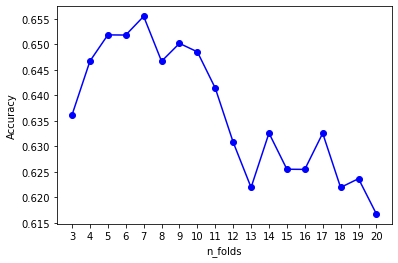

In [58]:
plt.plot(n_neighbors_list, perf_list, '-bo')
plt.xlabel('n_folds')
plt.xticks(n_neighbors_list)
plt.ylabel('Accuracy')
plt.show()

In [59]:
idx_min = np.argmax(perf_list)
best_n_neighbors = n_neighbors_list[idx_min]
best_performance = perf_list[idx_min]


print("Best n_neighbors: ", best_n_neighbors)
print("Best cv performance: ", best_performance)

Best n_neighbors:  7
Best cv performance:  0.6554824561403508


In [60]:
clf = KNeighborsClassifier(n_neighbors=best_n_neighbors)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test,)

accuracy_score(y_test, y_pred)

0.6142857142857143